# Problem set 3: Loading and structuring data from Denmark Statistics

In [533]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# same import problem as problem set 1
# plt.style.use('seaborn-whitegrid') – the 'seaborn-whitegrid' style didn't work for me, to check which styles you have run: print(plt.style.available)
# print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
import pandas as pd
import ipywidgets as widgets

# Tasks

## Create a pandas DataFrame

Modify the code below such that *income* and *consumption* are variables in the *dt* DataFrame.

In [534]:
np.random.seed(1999)
 
N = 100
mydata = {}
mydata['id'] = range(N)
income = np.exp(np.random.normal(size=N))
consumption = np.sqrt(income)

# Adding income and consumtion to the dt DataFrame
mydata['income'] = income
mydata['consumption'] = consumption

dt = pd.DataFrame(mydata)
dt.head() # shows first five rows

# Useful Pandas functions
# dt.tail() # shows last five rows
# dt.sample(n) # displays the random n number of rows in the sample data
# dt.shape # displays the sample data's rows and columns (dimensions)
# dt.describe() # basic statistics of each column of the sample data
# dt.info() # information about the various data types used and the non-null count of each column
# dt['income'] # select the particular column
# dt.iloc[0] # select a particular row based on its index
# dt[['id', 'income']] # select multiple columns given

# data cleaning
# dt.isnull() # identify the missing values in your dataframe
# dt.dropna() # remove the rows containing missing values in any column
 

,id,income,consumption
0,0,0.727981,0.853218
1,1,1.997831,1.413447
2,2,0.276823,0.526140
3,3,1.481931,1.217346
4,4,1.235904,1.111712


**Answer:** see A01.py

## Create new variable

1) Add a new variable *ratio* which is the ratio of consumption to income.

In [535]:
# ratio: divide consumption with income and add new column

dt['ratio_cons_income'] = (dt['consumption']/dt['income'])
dt.head()

,id,income,consumption,ratio_cons_income
0,0,0.727981,0.853218,1.172033
1,1,1.997831,1.413447,0.707490
2,2,0.276823,0.526140,1.900636
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513


**Answer:** See A02.py

## Summary statistics

Produce summary statistics using `.describe()`.

In [536]:
dt.describe()

,id,income,consumption,ratio_cons_income
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,1.415547,1.087844,1.117517
std,29.011492,1.322203,0.484238,0.525452
min,0.000000,0.108402,0.329245,0.351134
25%,24.750000,0.529323,0.727545,0.752310
50%,49.500000,0.981178,0.990533,1.009580
75%,74.250000,1.768211,1.329572,1.374491
max,99.000000,8.110612,2.847914,3.037255


**Answer:** See A03.py

## Indexing

Select everybody with an income above 1.

In [537]:
# dt.loc[] is a tool for selecting specific rows and columns based on their labels or conditions

I = dt['income'] > 1
dt.loc[I, :].head() # dt.loc[I, :] indicates that you want to select all columns in the DataFrame which "ensure" I 

# dt.query('income > 1').head()

,id,income,consumption,ratio_cons_income
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
6,6,2.574032,1.604379,0.623294
7,7,2.475478,1.573365,0.635580


**Answer:** See A04.py

Select everybody with an income *above* 1 and a ratio *above* 0.7.

In [538]:
# no need to define I (income above 1) again

R = dt['ratio_cons_income'] > 0.7
dt.loc[I & R].head()

# I_R = (dt['income'] > 1) & (dt['ratio'] > 0.7)
# dt.loc[I_R].head()

,id,income,consumption,ratio_cons_income
1,1,1.997831,1.413447,0.707490
3,3,1.481931,1.217346,0.821459
4,4,1.235904,1.111712,0.899513
11,11,2.031708,1.425380,0.701567
18,18,1.280235,1.131475,0.883802


**Answer:** See A05.py

Set consumption equal to 0.5 if income is less than 0.5.

In [539]:
C = dt['income'] < 0.5
dt.loc[C, 'consumption'] = 0.5

dt['consumption'].mean() # <- compare with answer

1.075479712048503

**Answer:**  See A06.py

Set consumption equal to income if income is less than 0.5.

In [540]:
C_eq_I = dt['income'] < 0.5
dt.loc[C_eq_I, 'consumption'] = dt['income']

# dt.loc[C_eq_I, ['consumption']] = dt.loc[C_eq_I, ['income']].values

dt['consumption'].mean() # <- compare with answer

1.0337728690050054

**Answer:** See A07.py

## Dropping

Drop the *ratio* variable and all rows with an income above 1.5. After this, also drop the first 5 rows.

In [541]:
# make copy of dataframe before the following changes
dt_copy = dt.copy()

# prints the number of observations before
print(f'before: {dt.shape[0]} observations, {dt.shape[1]} variables')

# drop ratio
dt.drop('ratio_cons_income', axis=1, inplace=True) 
                             # axis=1 : dropping columns / dropping the ratio variable
                                     # if False, return a copy, otherwise, do operation in place and return None

# drop rows with income above 1.5
I = dt['income'] > 1.5
dt.drop(dt[I].index, inplace=True) # drops the rows from dt where the index corresponds to True values in the boolean array I

# drop the first five rows
dt.drop(dt.index[: 5], inplace=True)

# prints the number of observations after
print(f'after: {dt.shape[0]} observations, {dt.shape[1]} variables')

before: 100 observations, 4 variables
after: 65 observations, 3 variables


In [542]:
# example with at small DataFrame

df = pd.DataFrame(np.arange(16).reshape(4,4), columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [543]:
# dropping columns 

df.drop('B', axis=1) 

df.drop(['B', 'C'], axis=1)

df.drop(columns=['A', 'C'])


,B,D
0,1,3
1,5,7
2,9,11
3,13,15


In [544]:
# dropping rows by index

df.drop(0)

df.drop([0, 1])

,A,B,C,D
2,8,9,10,11
3,12,13,14,15


**Answer:** see A08.py

## Renaming

Rename *consumption* to *cons* and *income* to *inc*.

In [545]:
dt.rename(columns={'income':'inc', 'consumption':'con'}, inplace=True)

dt.head()

,id,inc,con
8,8,0.582074,0.762938
10,10,0.932044,0.965424
12,12,0.356952,0.356952
13,13,0.379825,0.379825
16,16,0.700896,0.837195


**Answer:** see A09.py

## Functions

Correct the wrong lines such that `assets_1 = assets_2 = assets_3 = assets_4`.

In [546]:
# MISTAKE in dt['assets_3'] = ... : .values() is not a method that can be called with parentheses on a NumPy array/DataFrame 
# Instead, .values is an attribute of a pandas Series object that returns a NumPy array representation of the values in the Series/dataframe
# Either use .values without parentheses or simply use .to_numpy() - converts the DataFrame to a NumPy array

def assets_row_by_row(x, R, Y):
    return R * (x['inc'] - x['con'])+Y # edited line
    
def assets_all_at_once(income, consumption, R, Y):
    return R * (income - consumption) + Y # edited line

def assets_adj(assets, R, Y):
    # edited lines
    assets *= R
    assets += Y

R = 1.2 # return rate
Y = 1 # income
try:
    dt['assets_1'] = R*(dt['inc']-dt['con'])+Y
    dt['assets_2'] = dt.apply(assets_row_by_row,axis=1,args=(R,Y))
    dt['assets_3'] = assets_all_at_once(dt['inc'].to_numpy(),dt['con'].to_numpy(),R,Y) # will print "failed" if dt.values()
    dt['assets_4'] = dt['inc']-dt['con']
    assets_adj(dt['assets_4'],R,Y)
except:
    print('failed')
    
dt.head()    

,id,inc,con,assets_1,assets_2,assets_3,assets_4
8,8,0.582074,0.762938,0.782963,0.782963,0.782963,0.782963
10,10,0.932044,0.965424,0.959943,0.959943,0.959943,0.959943
12,12,0.356952,0.356952,1.000000,1.000000,1.000000,1.000000
13,13,0.379825,0.379825,1.000000,1.000000,1.000000,1.000000
16,16,0.700896,0.837195,0.836441,0.836441,0.836441,0.836441


**Answer:** see A10.py

# Problem

Load the data set in *data/NAH1_pivoted.xlsx* and clean and structure it such that the `plot_timeseries(dataframe)` below can be run and produce an interactive figure. 

In [547]:
def _plot_timeseries(dataframe, variable, years):
    
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    dataframe.loc[:,['year']] = pd.to_numeric(dataframe['year'])
    I = (dataframe['year'] >= years[0]) & (dataframe['year'] <= years[1])
    
    x = dataframe.loc[I,'year']
    y = dataframe.loc[I,variable]
    ax.plot(x,y)
    
    ax.set_xticks(list(range(years[0], years[1] + 1, 5)))    
    
def plot_timeseries(dataframe):
    
    widgets.interact(_plot_timeseries, 
    dataframe = widgets.fixed(dataframe),
    variable = widgets.Dropdown(
        description='variable', 
        options=['Y','C','G','I','X','M'], 
        value='Y'),
    years=widgets.IntRangeSlider(
        description="years",
        min=1966,
        max=2018,
        value=[1980, 2018],
        continuous_update=False,
    )                 
); 

**Hint 1:** You can base your renaming on this dictionary:

In [548]:
rename_dict = {}
rename_dict['P.1 Output'] = 'Y'
rename_dict['P.3 Final consumption expenditure'] = 'C'
rename_dict['P.3 Government consumption expenditure'] = 'G'
rename_dict['P.5 Gross capital formation'] = 'I'
rename_dict['P.6 Export of goods and services'] = 'X'
rename_dict['P.7 Import of goods and services'] = 'M'

**Hint 2:** You code should have the following structure:

In [557]:
# a. load data set
nah1 = pd.read_excel('data/NAH1_pivoted.xlsx', skiprows=2) # skiprows=2 : take a look in the data

# b. rename variables
rename_dict['Unnamed: 0'] = 'year'
nah1.rename(columns=rename_dict, inplace=True)

# c. remove rows where Y is nan
nah1.dropna(subset=['Y'], inplace=True) 

# d. correct year column data
# hint, nah1.loc[J,['year']] = nah1.loc[I,['year']].values
I = nah1.dropna(subset='year', inplace=True)

nah1['year'][J.values] = nah1['year'][I.values].values

# e. only keep rows with '2010-prices, chained values'

# f. only keep renamed variables

# g. interactive plot
# plot_timeseries(nan)

**Answer:** see A11.py

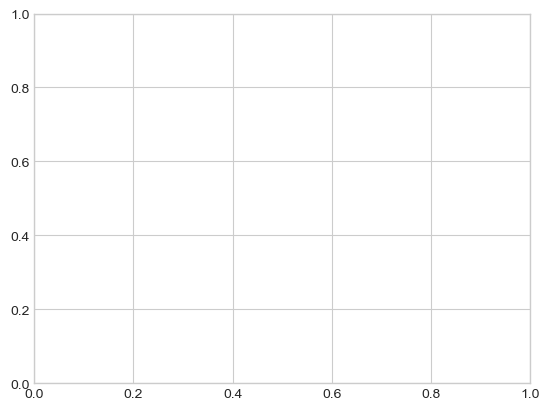

interactive(children=(Dropdown(description='variable', options=('Y', 'C', 'G', 'I', 'X', 'M'), value='Y'), Int…

In [550]:
plot_timeseries(nah1)

# Extra problems

## Extend interactive plot

Extend the interactive plot with a choice of *real* vs *nominal*.

## New data set

Load data from an Excel or CSV file you have downloaded from e.g. [Statistikbanken.dk](https://www.statistikbanken.dk/). Clean, structure and present the data as you see fit.